Objective of this problem:

1. NZ Airlines has a FFP(frequent flyer program).

2. NZA is in possession of a lot of data about the behavior of their FFP customers.

3. NZA wishes to develop meaningful customer segments using the FFP behavior data.

4. NZA will use the profile and size of customer segments to develop appropriate
marketing and promotional programs to improve their revenues, and satisfy their
customers better.

Approach to achieve the objective: 

We have to make customer segments in this particular problem by using clustering methods. 

In [ ]:
import os

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FrequentFlyerProgram.xls to FrequentFlyerProgram.xls


In [ ]:
# reading the file as a dataframe

ffp_data = pd.read_excel(io = 'FrequentFlyerProgram.xls', sheet_name = 'Data')

In [ ]:
# checking the first few observations of dataframe

ffp_data.head()

,FFP#,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
0,1072,42040,1000,14189,17,4034,13,5717
1,1502,30486,0,0,0,0,0,5051
2,2307,85496,0,2799,7,2711,6,3820
3,3652,1884,0,0,0,0,0,31
4,815,42044,2253,11433,10,0,0,6140


In [ ]:
# checking the number of observations in the dataframe

ffp_data.shape

(3999, 8)

In [ ]:
# checking the data types of columns in the dataframe

ffp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FFP#                3999 non-null   int64
 1   AwardMiles          3999 non-null   int64
 2   EliteMiles          3999 non-null   int64
 3   PartnerMiles        3999 non-null   int64
 4   PartnerTrans        3999 non-null   int64
 5   FlyingReturnsMiles  3999 non-null   int64
 6   FlightTrans         3999 non-null   int64
 7   EnrollDuration      3999 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


The output of above code expression gives us information that each of the columns in the dataframe have integer data type. 

However, Frequent Flyer Program ID, 'FFP#' corresponds to identification number of passengers or customers of NZ Airlines, who are enrolled in the airline's Frequent Flyer Program. Hence, this column is a discrete categorical variable on which numerical computations are not supposed to be performed in the given dataset.  

In [ ]:
# checking the statistical description of the columns in the dataframe

ffp_data.describe()

,FFP#,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,2014.819455,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1160.764358,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,1.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1010.500000,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,2016.000000,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,3020.500000,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,4021.000000,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [ ]:
# checking the total number of null values, if any, in each of the columns of the dataframe

ffp_data.isnull().sum()

FFP#                  0
AwardMiles            0
EliteMiles            0
PartnerMiles          0
PartnerTrans          0
FlyingReturnsMiles    0
FlightTrans           0
EnrollDuration        0
dtype: int64

It can be inferred from the output of above code expression that there are no null values in each of the columns of dataframe

In [ ]:
# Since the column 'FFP#' corresponds to the Frequent Flyer Program ID, the dataframe, ffp_data can be indexed by values in 'FFP#' column of the dataframe

ffp_data = pd.read_excel(io = 'FrequentFlyerProgram.xls', sheet_name = 'Data', index_col = 0)

In [ ]:
# verifying whether the dataframe, ffp_data is indexed by 'FFP#' values

ffp_data.index

Int64Index([1072, 1502, 2307, 3652,  815, 3611, 3795, 2657, 2529,  250,
            ...
            1811,  967,  474, 1647, 3411, 3962, 1021, 1271, 3227, 2192],
           dtype='int64', name='FFP#', length=3999)

In [ ]:
# checking whether there are any duplicate values in the index labels of dataframe

ffp_data.index.is_unique

True

The output of above code expression suggests that each of the values in 'FFP#' are unique. 

In [ ]:
# sorting the rows of the dataframe by index values in ascending order

ffp_data.sort_index(inplace = True)

Important Observation:

In the given dataset, we have to ultimately segment the customers based on their flying behavior as members of the Frequent Flyer Program of NZ Airlines. The purpose of customer segmentation is to provide insights to the airline that could enable the NZ Airlines to improve the customer experience, devise marketing programs based on the flying behavior of its customers given in the dataset to increase their profitability. However, costs can increase tremendously if the airline chooses to create promotional programs with characteristics as per the preferences or flying behavior for every specific customer. Hence, we have to generalise insights from the dataset and remove outliers or customers with distinctive flying behavior to assist the airline in devising a low-cost promotional programs. 

It is also important to note that if airline intends to adopt online customized promotional programs, all the values, including outliers can be considered to give insights to the airline as the costs could be significantly lower for developing such programs. Moreover, the ability of an analyst to suggest optimal insights to the airline for its customer experience improvement and promotional programs depends on the extent to which an airline can allocate funds for expenditures on such programs, existing demand of customers, whether it is stable or fluctuating based on external factors such as weak economy or rise in airline passenger fares because of increase in fuel costs, etc. Moreover, it is also possible that the customers for whom the enroll duration is lower or who have enrolled recently relative to other customers in the frequent flyer program might have enrolled because they are friends or family members of customers, who have been enrolled as a member in the FFP program for many days. In such cases, the promotional programs may fail to achieve their intended purpose. 

Another important point to note in this dataset pertains to the column, 'EnrollDuration'. For those customers who have been enrolled in the FFP program for relatively longer period in days may have traveled for relatively more miles and thus, could be eligible for award travel and could qualify for the elite status when compared with those customers who have been enrolled in the FFP program for less number of days. Since the customer segmentation has to be based on the flying behavior of FFP members, duration of enrollment is a crucial factor for making an informed assessment of flying behavior of airline customer. We cannot make a more accurate judgement or analysis about the flying behavior of an airline customer if he has been enrolled in the FFP program for a less period as there could be less data available to record the flying behavior of such a customer. 



**Checking the counts of unique values in each of the columns of dataframe**

In [ ]:
ffp_data['AwardMiles'].value_counts()

1000      10
500        5
2000       5
1500       4
16200      3
          ..
24838      1
34086      1
7457       1
245021     1
0          1
Name: AwardMiles, Length: 3904, dtype: int64

In [ ]:
ffp_data['EliteMiles'].value_counts()

0       3773
1000      17
500       15
1745       4
888        4
        ... 
651        1
4727       1
629        1
8753       1
2178       1
Name: EliteMiles, Length: 164, dtype: int64

There are lot of customers (approximately 94.3%) for whom the the value of 'EliteMiles' is zero, which suggests almost no customers have qualified for elite status and that suggests a potential loss of revenue for airline as customers enrolled in the FFP program are upgraded to such status only when they have travelled a significant number of miles in the past. 

In [ ]:
ffp_data['PartnerMiles'].value_counts()

0        475
500       66
1000      42
100       27
1500      25
        ... 
14938      1
29271      1
37461      1
2644       1
8183       1
Name: PartnerMiles, Length: 2734, dtype: int64

In [ ]:
ffp_data['PartnerTrans'].value_counts()

0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
19     97
10     97
9      91
7      88
20     85
21     69
22     63
26     41
24     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
65      2
46      2
49      2
52      1
68      1
86      1
55      1
58      1
Name: PartnerTrans, dtype: int64

In [ ]:
ffp_data['FlyingReturnsMiles'].value_counts()

0       2723
500      195
1000      53
150       51
100       49
        ... 
6400       1
255        1
2276       1
6368       1
4084       1
Name: FlyingReturnsMiles, Length: 343, dtype: int64

In [ ]:
ffp_data['FlightTrans'].value_counts()

0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
17       8
18       8
14       7
13       7
23       7
29       5
26       5
28       4
24       4
20       4
19       2
53       2
31       1
22       1
36       1
45       1
21       1
25       1
27       1
46       1
Name: FlightTrans, dtype: int64

In [ ]:
ffp_data['EnrollDuration'].value_counts()

8296    38
8289    33
8228    15
4791     7
1597     7
        ..
4533     1
4531     1
6578     1
798      1
6150     1
Name: EnrollDuration, Length: 2820, dtype: int64

Actions based on inferences made from the values in 'EnrollDuration' column: 

We can create a new column in dataframe that will contain values in 'EnrollDuration' in terms of years for our better interpretation. Since a year usually has 365 days except leap year that has 366 days, it won't make much of a difference in result if we divide each of the values in 'EnrollDuration' column by 365 or 366 to get the number of years passed since the customers enrolled in the FFP program of NZ Airlines. 

In [ ]:
# adding a new column, 'EnrollYears' to ffp_data dataframe containing duration of enrollment of airline customers in FFP program in years 

val = pd.Series(ffp_data['EnrollDuration']/365)

ffp_data.insert(7, 'EnrollYears', val, True)

In [ ]:
# checking the new column, 'EnrollYears' in dataframe, ffp_data

ffp_data['EnrollYears'].head()

FFP#
1    19.178082
2    19.090411
3    19.271233
4    19.046575
5    19.000000
Name: EnrollYears, dtype: float64

In [ ]:
ffp_data.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears
FFP#,,,,,,,,
1,28143,0,174,1,0,0,7000,19.178082
2,19244,0,215,2,0,0,6968,19.090411
3,41354,0,4123,4,0,0,7034,19.271233
4,14776,0,500,1,0,0,6952,19.046575
5,97752,0,43300,26,2077,4,6935,19.000000


In [ ]:
ffp_data['EnrollYears'].value_counts()

22.728767    38
22.709589    33
22.542466    15
4.375342      7
20.457534     7
             ..
9.465753      1
18.515068     1
20.484932     1
5.939726      1
19.000000     1
Name: EnrollYears, Length: 2820, dtype: int64

**Data Visualization**


---



In [ ]:
# importing necessary packages for data visualization

import seaborn as sns

import matplotlib.pyplot as plt

In case of the pairwise plots, we will observe information about distribution of data in each of the columns except 'EnrollDuration' with particular focus on the relation between 'EnrollYears' and rest of the columns except 'EnrollDuration'. This approach is followed because time passed since enrollment in the FFP program can give us a better understanding of the flying behavior of customers given in the dataset. 

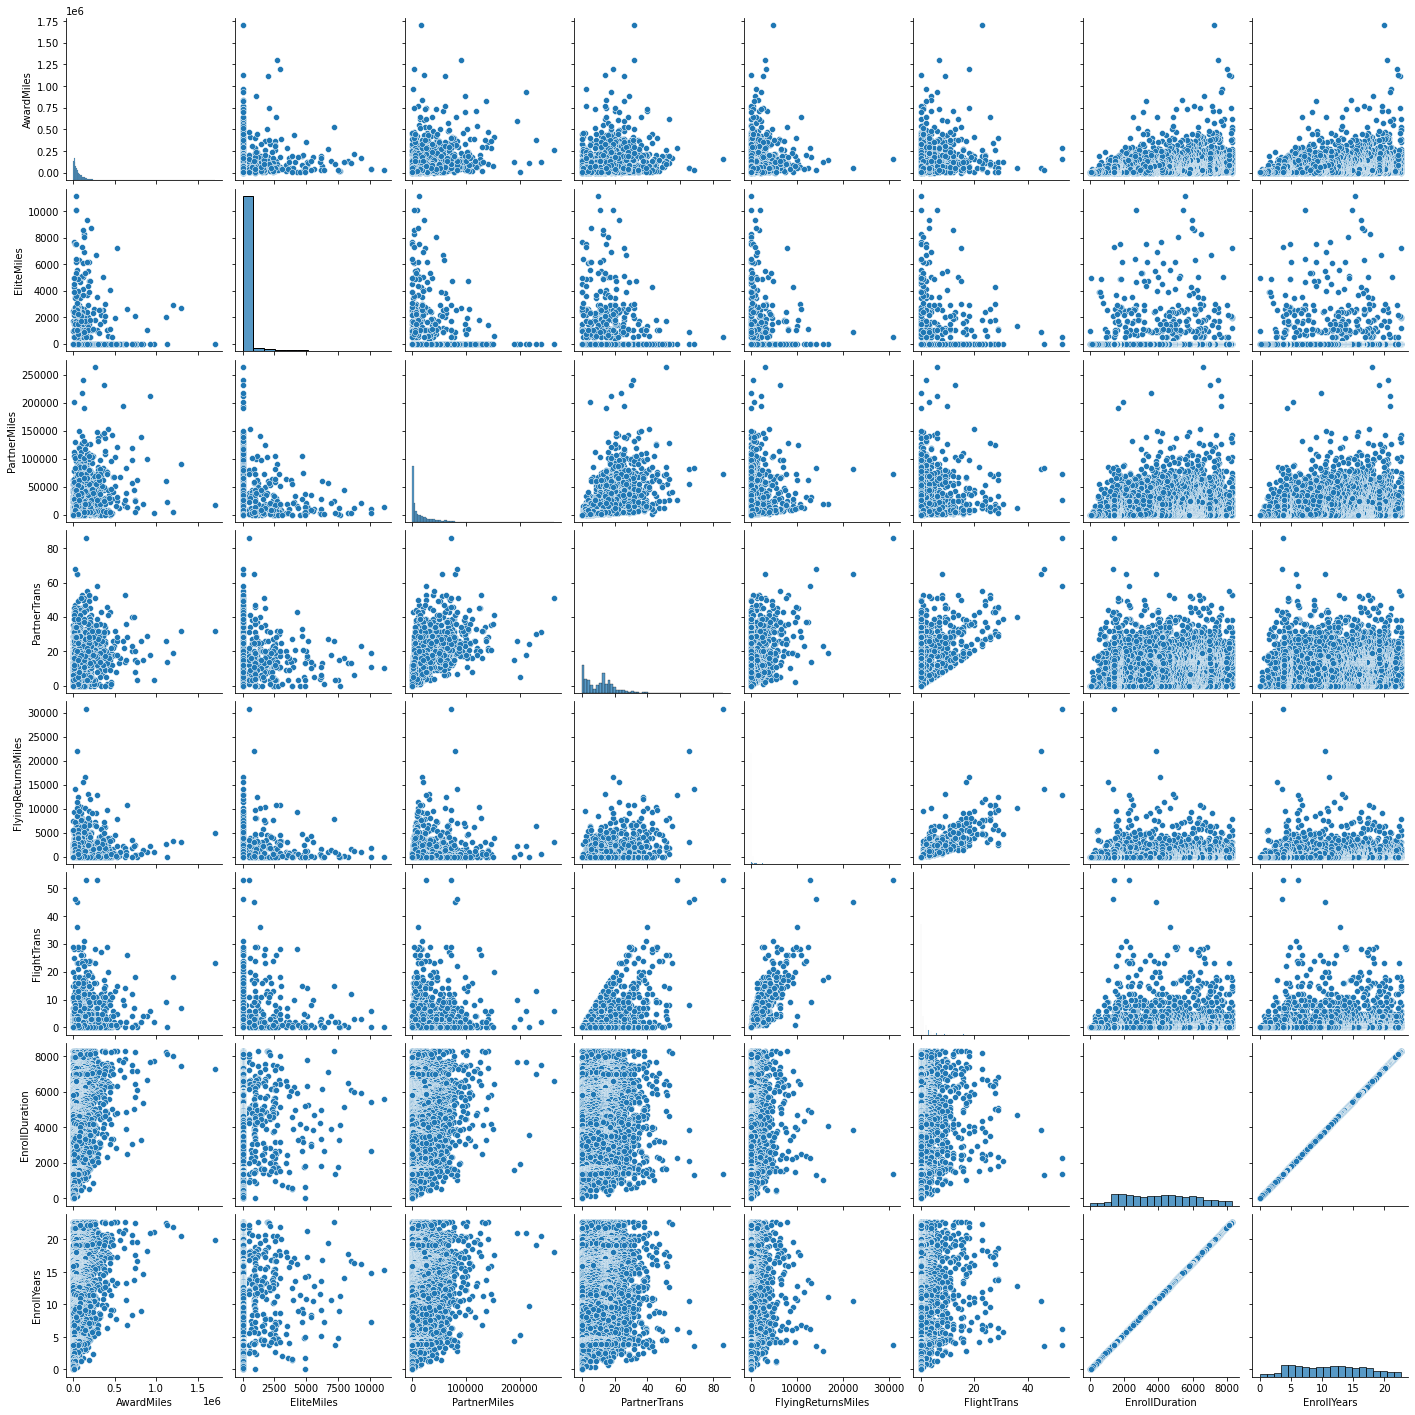

In [ ]:
# making a pairwise scatter plot with particular focus on relation between 'EnrollYears' and other columns in the dataframe

sns.pairplot(ffp_data, kind = 'scatter')


The above pairwise plot clearly shows a linear relation between 'PartnerTrans' and 'PartnerMiles', 'FlyingReturnsMiles' and 'FlightTrans', 'PartnerTrans' and 'FlightTrans'. Moreover, we do not observe particular clustering of data between pair of features in the plot. 

In [ ]:
# checking the correlation between columns in ffp_data

corr_ffpdata = ffp_data.corr()

corr_ffpdata

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears
AwardMiles,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129,0.263129
EliteMiles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312,0.017312
PartnerMiles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397,0.210397
PartnerTrans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262,0.161262
FlyingReturnsMiles,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271,0.037271
FlightTrans,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260,0.059260
EnrollDuration,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000,1.000000
EnrollYears,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000,1.000000


Interpretation:

The above code expression shows a strong positive linear relationship between 
'FlightTrans' and 'FlyingReturnsMiles' and moderate positive linear relationship between 'PartnerTrans' and 'PartnerMiles'. However, we know that correlation does not imply causation and after referring to the webpage referred to in the assignment question (https://en.wikipedia.org/wiki/Frequent-flyer_program), we have deduced that airlines do not necessarily follow a fixed criteria for awarding a customer with elite status, award miles or partner miles only on the basis of total distance traveled in miles by the customer. Sometimes, the airlines can also take into consideration the total amount spent by the customers on flight tickets along with the miles traveled to bestow the elite status or award additional miles for travel. In this assignment question, no information is given about the criteria used by the airline to award elite status or additional miles to its customers to make a proper inference. 

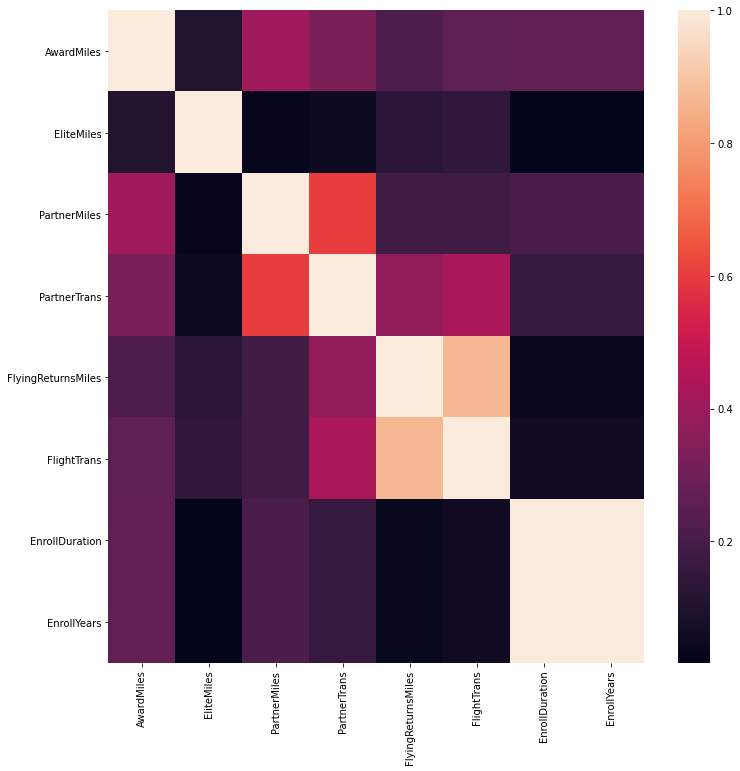

In [ ]:
# plotting the correlation between features in dataframe

plt.figure(figsize = (12,12))
sns.heatmap(np.abs(corr_ffpdata), xticklabels = corr_ffpdata.columns, yticklabels = corr_ffpdata.columns)
plt.show()

In [ ]:
# since the units used for measurement differ in each of the columns of dataframe, creating a list of units correponding to the sequence of 
# columns in dataset and each of their respective units

units = ['miles', 'miles', 'miles', 'counts', 'miles', 'counts', 'days', 'years']

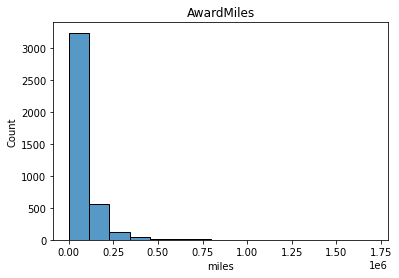

In [ ]:
# now, checking the histogram of each feature in the dataset

sns.histplot(ffp_data['AwardMiles'], bins = 15)
plt.xlabel(units[0])
plt.title('AwardMiles')
plt.show()


The above plot shows that data is right-skewed in feature 'AwardMiles'

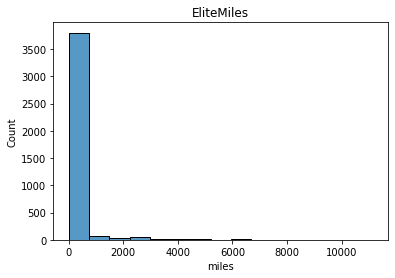

In [ ]:
sns.histplot(ffp_data['EliteMiles'], bins = 15)
plt.xlabel(units[1])
plt.title('EliteMiles')
plt.show()


The above plot shows that data is right-skewed also in case of 'EliteMiles' column.

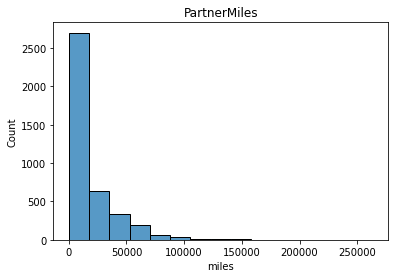

In [ ]:
sns.histplot(ffp_data['PartnerMiles'], bins = 15)
plt.xlabel(units[2])
plt.title('PartnerMiles')
plt.show()

Above plot shows that data is right-skewed in 'PartnerMiles' column

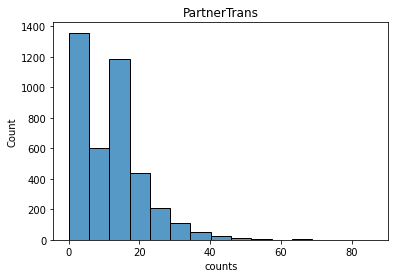

In [ ]:
sns.histplot(ffp_data['PartnerTrans'], bins = 15)
plt.xlabel(units[3])
plt.title('PartnerTrans')
plt.show()

Above plot shows that data is right-skewed in 'PartnerTrans' column

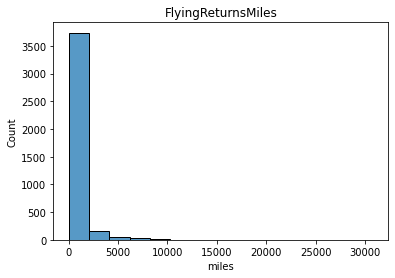

In [ ]:
sns.histplot(ffp_data['FlyingReturnsMiles'], bins = 15)
plt.xlabel(units[4])
plt.title('FlyingReturnsMiles')
plt.show()

Above plot shows that data is right-skewed in 'FlyingReturnsMiles' column



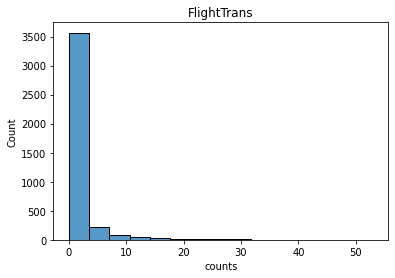

In [ ]:
sns.histplot(ffp_data['FlightTrans'], bins = 15)
plt.xlabel(units[5])
plt.title('FlightTrans')
plt.show()

Above plot shows that data is right-skewed in 'FlightTrans' column



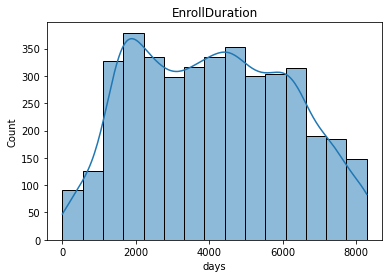

In [ ]:
sns.histplot(ffp_data['EnrollDuration'], bins = 15, kde = True)
plt.xlabel(units[6])
plt.title('EnrollDuration')
plt.show()

Above plot shows that data is close to normally distributed in 'EnrollDuration' column

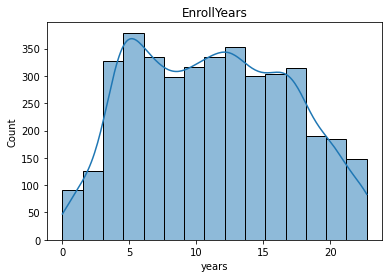

In [ ]:
sns.histplot(ffp_data['EnrollYears'], bins = 15, kde = True)
plt.xlabel(units[7])
plt.title('EnrollYears')
plt.show()

Above plot shows that data is close to normally distributed in 'EnrollYears' column

Dividing the values in 'EnrollYears' column into different range of values can enable us to make better understanding with respect to the other features

In [ ]:
ffp_data['EnrollYears'].describe()

count    3999.000000
mean       11.283724
std         5.657903
min         0.005479
25%         6.383562
50%        11.221918
75%        15.864384
max        22.728767
Name: EnrollYears, dtype: float64

Observations:

Based on the statistical summary of 'EnrollYears' column above, we can divide the year values into 4 different sets by using the percentile data. For instance, '0-6' corresponds to lower 25% of data, which is greater than or equal to zero but less than 6. Similarly, there will be three other sets - '6-11', '11-15', and '15-23'. Thus, the outer limit or maximum value in each set is not included.

In [ ]:
# preparing the different sets based on the values in 'EnrollYears' column

list_yeartype = []

for i in ffp_data.index:
  if (ffp_data.loc[i, 'EnrollYears'] >= 0) and (ffp_data.loc[i, 'EnrollYears'] < 6):
    list_yeartype.append('0-6')
  if (ffp_data.loc[i, 'EnrollYears'] >= 6) and (ffp_data.loc[i, 'EnrollYears'] < 11):
    list_yeartype.append('6-11')
  if (ffp_data.loc[i, 'EnrollYears'] >= 11) and (ffp_data.loc[i, 'EnrollYears'] < 15):
    list_yeartype.append('11-15')
  if (ffp_data.loc[i, 'EnrollYears'] >= 15) and (ffp_data.loc[i, 'EnrollYears'] < 23):
    list_yeartype.append('15-23')

print(list_yeartype)
  

['15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', '15-23', 

In [ ]:
# inserting the list, list_yeartype in ffp_data dataframe as a new column 'YearRange'

ffp_data.insert(8, 'YearRange', list_yeartype, True)

In [ ]:
# verifying the addition of new column, 'YearRange' in ffp_data dataframe

ffp_data.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears,YearRange
FFP#,,,,,,,,,
1,28143,0,174,1,0,0,7000,19.178082,15-23
2,19244,0,215,2,0,0,6968,19.090411,15-23
3,41354,0,4123,4,0,0,7034,19.271233,15-23
4,14776,0,500,1,0,0,6952,19.046575,15-23
5,97752,0,43300,26,2077,4,6935,19.000000,15-23


Next steps:

We will check the relation between 'YearRange' and median values of the features except 'EnrollDuration' and 'EnrollYears' as it was observed earlier in the statistical description that the data in almost all the features do not follow Gaussian distribution.

In [ ]:
# checking the relation between features 'YearRange' and 'AwardMiles'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['YearRange'], values = ffp_data['AwardMiles'], aggfunc = 'median')

YearRange,0-6,11-15,15-23,6-11
YearRange,,,,
0-6,23704.0,NaN,NaN,NaN
11-15,NaN,49020.5,NaN,NaN
15-23,NaN,NaN,62080.0,NaN
6-11,NaN,NaN,NaN,44206.0


Interpretation:

It is clearly evident from the output of above code expression that for customers who have been enrolled in the FFP program for the longest time as indicated in the set of 15-23 years have the highest median number of miles eligible for award travel while those who have been enrolled in the FFP program have lowest median number of miles eligible for award travel. Moreover, if we do simple multiplication to check the patterns, 23704 in the set 0-6 when multiplied by 2 gives 47408, which is slightly less than 44206 in set 6-11(deficit of 3202) and if we compare the differences between the median values in other sets, the difference is too high to generalise the flying behavior of customers.

At this stage, it is also important to check the counts of customers corresponding to each of the values in 'YearRange' to check whether there is lot of disparity in the number of customers given in the dataset with respect to their enrollment period in the FFP program.

In [ ]:
# checking the counts of FFP enrolled customers given in the dataset with respect to values in 'YearRange'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['YearRange'], values = ffp_data['AwardMiles'], aggfunc = 'count')

YearRange,0-6,11-15,15-23,6-11
YearRange,,,,
0-6,915.0,NaN,NaN,NaN
11-15,NaN,872.0,NaN,NaN
15-23,NaN,NaN,1165.0,NaN
6-11,NaN,NaN,NaN,1047.0


Interpretation:

Since there are total 3999 samples, which is close to 4000 airline customers in the give dataset and there are 4 sets, we require close to 25% examples or sample points in every set. If we calculate the proportion of customers in very set, they fall in the range between -5% and +5% from 25% of total number of customers i.e.; 4000/4 or 1000 customers.

In addition, flying behavior can also be inferred from the number of flight miles and flight transactions the customer has traveled in the past 12 months. Furthermore, the values in 'EliteMiles' can be categorised into 2 kinds - one equal to zero and other greater than 0 and then compared with each the 'AwardMiles' median values and the 'YearRange' values as there are approximately 94% of values that are equal to zero in 'EliteMiles' column as observed earlier.

In [ ]:
# categorizing 'EliteMiles' into two values - 'gt0' (greater than 0) and 'et0' (equal to 0)

list_elitemiles = []

for i in ffp_data.index:
  if ffp_data.loc[i, 'EliteMiles'] == 0:
    list_elitemiles.append('eql0')
  if ffp_data.loc[i, 'EliteMiles'] > 0:
    list_elitemiles.append('grt0')

print(list_elitemiles)

['eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0',

In [ ]:
# inserting the list, list_yeartype in ffp_data dataframe as a new column 'EliteVal'

ffp_data.insert(9, 'EliteVal', list_elitemiles, True)

In [ ]:
# verifying the addition of column, 'EliteVal'

ffp_data.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears,YearRange,EliteVal
FFP#,,,,,,,,,,
1,28143,0,174,1,0,0,7000,19.178082,15-23,eql0
2,19244,0,215,2,0,0,6968,19.090411,15-23,eql0
3,41354,0,4123,4,0,0,7034,19.271233,15-23,eql0
4,14776,0,500,1,0,0,6952,19.046575,15-23,eql0
5,97752,0,43300,26,2077,4,6935,19.000000,15-23,eql0


In [ ]:
# checking the relation between median 'AwardMiles' and 'EliteVal'

pd.crosstab(index = ffp_data['EliteVal'], columns = ffp_data['EliteVal'], 
            values = ffp_data['AwardMiles'], aggfunc = 'median')

EliteVal,eql0,grt0
EliteVal,,
eql0,40994.0,NaN
grt0,NaN,66838.5


In [ ]:
# checking the relation between median 'YearRange' and 'EliteVal' w.r.t. median values of 'AwardMiles'

pd.crosstab(index = ffp_data['EliteVal'], columns = ffp_data['YearRange'], 
            values = ffp_data['AwardMiles'], aggfunc = 'median')

YearRange,0-6,11-15,15-23,6-11
EliteVal,,,,
eql0,22966.0,46272.0,59657.5,42970.0
grt0,46525.0,71128.0,103891.0,71881.5


In [ ]:
# checking the relation between median 'YearRange' and 'EliteVal' w.r.t. counts of 'AwardMiles' for comparison with the 
# output of above code expression 

pd.crosstab(index = ffp_data['EliteVal'], columns = ffp_data['YearRange'], 
            values = ffp_data['AwardMiles'], aggfunc = 'count', margins = True)

YearRange,0-6,11-15,15-23,6-11,All
EliteVal,,,,,
eql0,869,813,1092,999,3773
grt0,46,59,73,48,226
All,915,872,1165,1047,3999


In [ ]:
# checking the relation between median 'YearRange' and 'PartnerMiles'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['YearRange'], 
            values = ffp_data['PartnerMiles'], aggfunc = 'median', margins = True)

YearRange,0-6,11-15,15-23,6-11,All
YearRange,,,,,
0-6,3375.0,NaN,NaN,NaN,3375.0
11-15,NaN,8062.5,NaN,NaN,8062.5
15-23,NaN,NaN,12500.0,NaN,12500.0
6-11,NaN,NaN,NaN,7072.0,7072.0
All,3375.0,8062.5,12500.0,7072.0,7171.0


Interpretation:

It can be observed again that the 'PartnerMiles' or number of miles earned from transactions while using airline's partner services in the last 12 months increases with the increase in enrollment period of FFP customers in 4 values in 'YearRange' column with the highest values in set '15-23'. 



In [ ]:
# checking the relation between median 'YearRange' and 'PartnerTrans'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['YearRange'], 
            values = ffp_data['PartnerTrans'], aggfunc = 'median', margins = True)

YearRange,0-6,11-15,15-23,6-11,All
YearRange,,,,,
0-6,7.0,NaN,NaN,NaN,7
11-15,NaN,12.0,NaN,NaN,12
15-23,NaN,NaN,14.0,NaN,14
6-11,NaN,NaN,NaN,12.0,12
All,7.0,12.0,14.0,12.0,12


Important Interpretation:

The above code expression give a different kind of insight. 'PartnerTrans' pertains to number of transactions made with the airline's partner in the last 12 months. However, the pattern of increase in the value with the increase in enrollment period repeats itself as evident in the output of above code expression. The median number of transactions is highest for customers with enrollment period in the range of '15-23'. It might be possible that they have remained enrolled in the FFP program for so long because these particular customers fly often and the airline provides connections to their preferred destinations for which hardly any other airlines' flights are available. 

However, the relatively lower median number of transactions for customers with different enrollment period such as in '0-6' value in 'YearRange' does not offer much support to our analysis about flying behavior of airline's FFP customers in general. It is also possible that since the passengers who have remained enrolled for more years have traveled on the airlines' flights for more times and have been awarded miles for travel. They might have used the miles awarded to make more transactions in the past 12 months.

Observations:

'FlyingReturnsMiles' column has 2723 zero values i.e., 68% of the total number of customers given in the dataset. Hence, we will categorize this column by greater than 0 and equal to zero values to check the relationship with values in 'YearRange' column. 

In [ ]:
# categorizing 'FlyingReturnsMiles' into two values - 'gt0' (greater than 0) and 'et0' (equal to 0)

list_return_miles = []

for i in ffp_data.index:
  if ffp_data.loc[i, 'FlyingReturnsMiles'] == 0:
    list_return_miles.append('eql0')
  if ffp_data.loc[i, 'FlyingReturnsMiles'] > 0:
    list_return_miles.append('grt0')

print(list_return_miles)

['eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0',

In [ ]:
# inserting the list, list_return_miles in ffp_data dataframe as a new column 'ReturnMileVal'

ffp_data.insert(10, 'ReturnMileVal', list_return_miles, True)

In [ ]:
# verifying the addition of new column 'ReturnMileVal' in ffp_data dataframe

ffp_data.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears,YearRange,EliteVal,ReturnMileVal
FFP#,,,,,,,,,,,
1,28143,0,174,1,0,0,7000,19.178082,15-23,eql0,eql0
2,19244,0,215,2,0,0,6968,19.090411,15-23,eql0,eql0
3,41354,0,4123,4,0,0,7034,19.271233,15-23,eql0,eql0
4,14776,0,500,1,0,0,6952,19.046575,15-23,eql0,eql0
5,97752,0,43300,26,2077,4,6935,19.000000,15-23,eql0,grt0


In [ ]:
# checking the relation between median 'YearRange' and 'ReturnMileVal' with respect to the
# counts of 'FlyingReturnsMiles'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['ReturnMileVal'], 
            values = ffp_data['FlyingReturnsMiles'], aggfunc = 'count', margins = True)

ReturnMileVal,eql0,grt0,All
YearRange,,,
0-6,688,227,915
11-15,573,299,872
15-23,748,417,1165
6-11,714,333,1047
All,2723,1276,3999


In [ ]:
# checking the relation between 'YearRange' and 'ReturnMileVal' with respect to the
# total number of miles traveled as per the values in 'FlyingReturnsMiles'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['ReturnMileVal'], 
            values = ffp_data['FlyingReturnsMiles'], aggfunc = 'sum', margins = True)

ReturnMileVal,eql0,grt0,All
YearRange,,,
0-6,0,336642,336642
11-15,0,403090,403090
15-23,0,601133,601133
6-11,0,498898,498898
All,0,1839763,1839763


Interpretation:

It can be inferred that customers in enrollment period '6-11', who have traveled more than zero miles in the past 12 months have covered more miles per customer when compared with those customers corresponding to '11-15' enrollment period. Moreover, '6-11' category customers have traveled more miles per customer than those in '15-23' group. 



In [ ]:
# 'FlightTrans' again has over 68% zero values. Hence, we will categorize the values in the column into 2 groups

# categorizing 'FlyingReturnsMiles' into two values - 'gt0' (greater than 0) and 'eql0' (equal to 0)

list_flight_trans = []

for i in ffp_data.index:
  if ffp_data.loc[i, 'FlightTrans'] == 0:
    list_flight_trans.append('eql0')
  if ffp_data.loc[i, 'FlightTrans'] > 0:
    list_flight_trans.append('grt0')

print(list_flight_trans)

['eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'grt0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'eql0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'grt0', 'eql0', 'grt0', 'eql0', 'eql0', 'grt0', 'eql0', 'eql0', 'eql0', 'grt0', 'grt0', 'eql0', 'eql0',

In [ ]:
# inserting the list, list_flight_trans in ffp_data dataframe as a new column 'FlTransVal'

ffp_data.insert(11, 'FlTransVal', list_flight_trans, True)

In [ ]:
ffp_data.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration,EnrollYears,YearRange,EliteVal,ReturnMileVal,FlTransVal
FFP#,,,,,,,,,,,,
1,28143,0,174,1,0,0,7000,19.178082,15-23,eql0,eql0,eql0
2,19244,0,215,2,0,0,6968,19.090411,15-23,eql0,eql0,eql0
3,41354,0,4123,4,0,0,7034,19.271233,15-23,eql0,eql0,eql0
4,14776,0,500,1,0,0,6952,19.046575,15-23,eql0,eql0,eql0
5,97752,0,43300,26,2077,4,6935,19.000000,15-23,eql0,grt0,grt0


In [ ]:
# checking the relation between 'YearRange' and 'FlightTrans' with respect to the
# sum of values in 'FlightTrans'

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['FlTransVal'], 
            values = ffp_data['FlightTrans'], aggfunc = 'sum', margins = True)

FlTransVal,eql0,grt0,All
YearRange,,,
0-6,0,971,971
11-15,0,1174,1174
15-23,0,1916,1916
6-11,0,1432,1432
All,0,5493,5493


In [ ]:
# checking the relation between 'YearRange' and 'FlightTrans' with respect to the
# count of customers

pd.crosstab(index = ffp_data['YearRange'], columns = ffp_data['FlTransVal'], 
            values = ffp_data['FlightTrans'], aggfunc = 'count', margins = True)

FlTransVal,eql0,grt0,All
YearRange,,,
0-6,688,227,915
11-15,573,299,872
15-23,748,417,1165
6-11,714,333,1047
All,2723,1276,3999


Interpretation:

The highest number of flight transactions per customer in last 12 months is highest in case of '15-23' group followed by '6-11'group, and then by '0-6' group in the 'YearRange' column. 

In [ ]:
# since each of the features are measured in distinct units in the dataset, scaling of features is important by using standardisation

# first, making a copy of dataframe, ffp_data with required columns

required_cols = ['AwardMiles', 'EliteMiles', 'PartnerMiles', 'PartnerTrans', 
                 'FlyingReturnsMiles', 'FlightTrans', 'EnrollDuration']

ffp_data1 = ffp_data[required_cols].copy(deep = True)


# importing necessary package
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ffp_data1 = scaler.fit_transform(ffp_data1.values)

ffp_data1 = pd.DataFrame(data = ffp_data1, columns = required_cols)

ffp_data1.head()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975


**K-Means Clustering**

---



In [ ]:
from sklearn import cluster

In [ ]:
model = cluster.KMeans(n_clusters = 3)

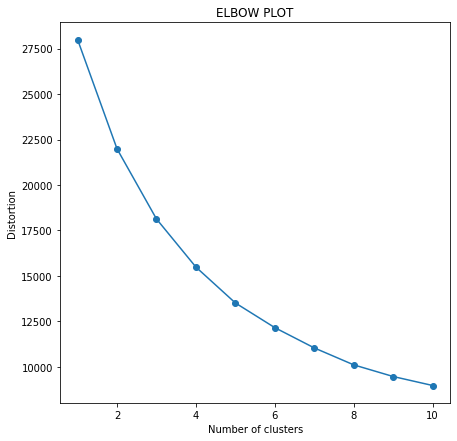

In [ ]:
# using elbow method to find the optimal value of K with respect to the 
# minimum value of WCSS (Within Cluster Sum of Squares) as evident by plotting 
# the different number of clusters or K-values with corresponding WCSS values of each of those clusters

distortions = []  # Empty list to store wcss

for i in range(1, 11):
    k_means = cluster.KMeans(n_clusters=i,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 100)
    k_means.fit(ffp_data1.values)
    distortions.append(k_means.inertia_)

#Plotting the K-means Elbow plot
plt.figure(figsize = (7,7)) 
plt.plot(range(1,11), distortions, marker='o')
plt.title('ELBOW PLOT')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


Interpretation:

We can observe in the elbow plot that the marginal decrease in plateaus occur where value of K = 4 in the plot. Hence, we will choose 4 clusters in K-means clustering method. 

In [ ]:
# clustering the data in ffp_data1 into 4 groups and label the datapoints with their
# assignment to clusters

k = 4
k_means_4 = cluster.KMeans(n_clusters= k,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 100)
k_means_4.fit(ffp_data1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
labels = k_means_4.labels_
Ccenters = k_means_4.cluster_centers_
ffp_data1['labels'] = labels
ffp_data1['labels'] = ffp_data1['labels'].astype('str')
print(ffp_data1['labels'])

0       0
1       0
2       0
3       0
4       1
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: labels, Length: 3999, dtype: object


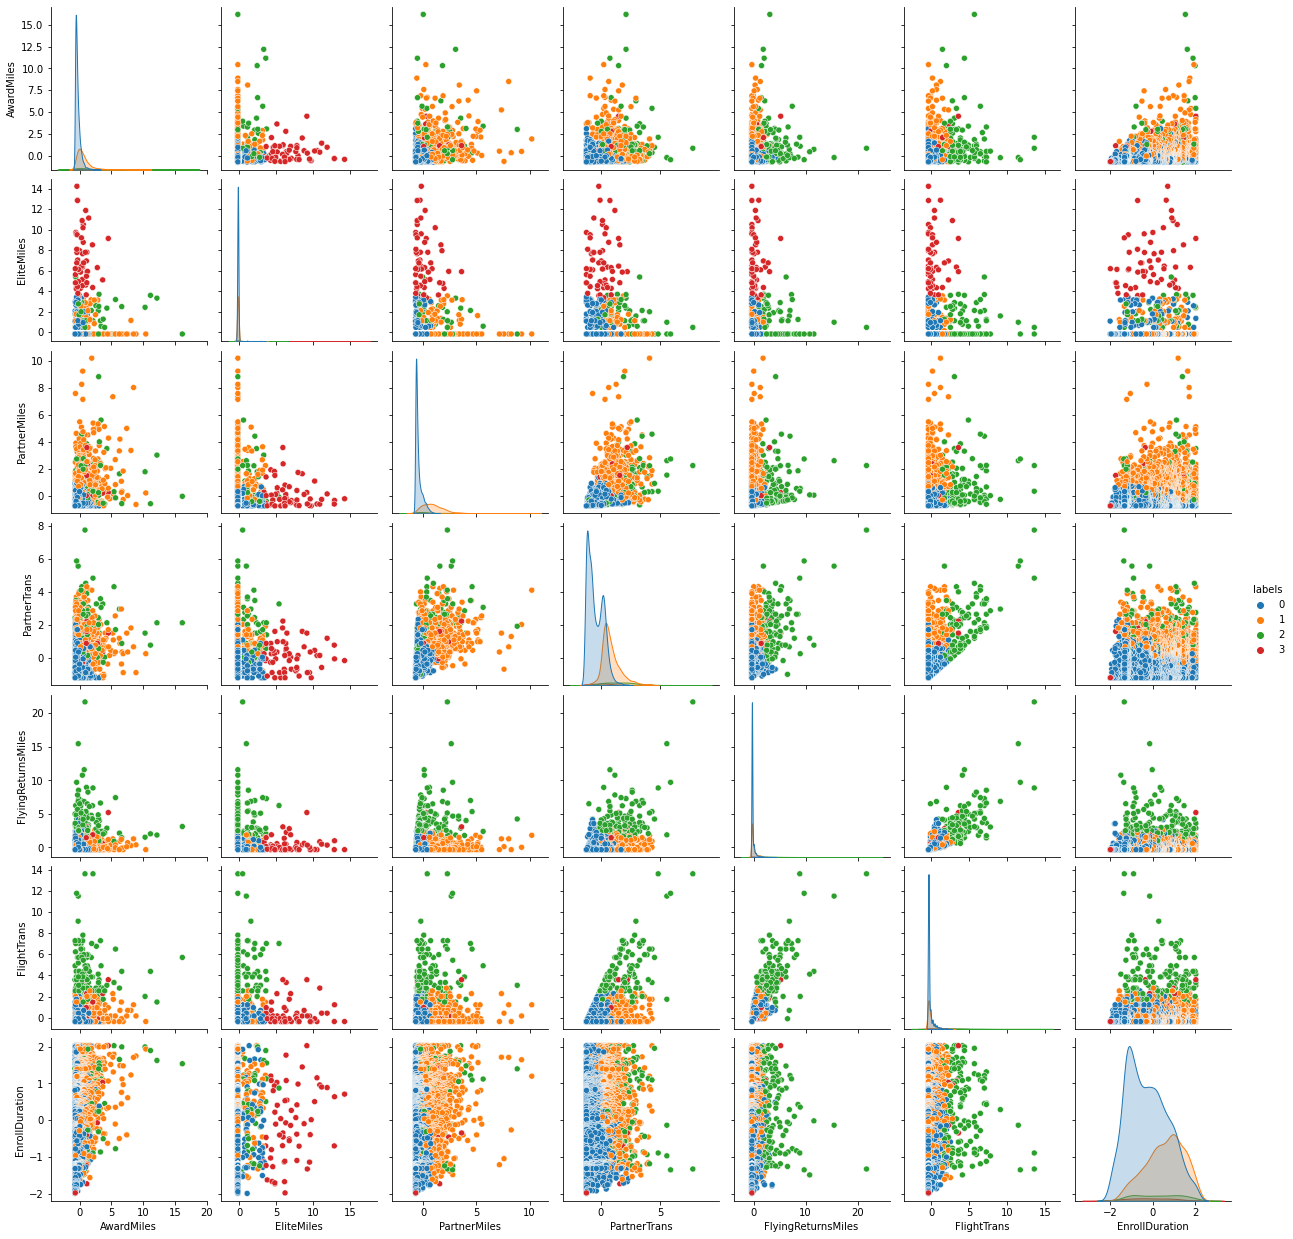

In [ ]:
# making a pairwise plot to observe the clustering

sns.pairplot(ffp_data1, x_vars = required_cols, y_vars = required_cols, hue='labels', diag_kind='kde')
plt.show()

Interpretation of plots:

We can observe in the above plots that the clusters are overlapping in each of the pairwise plots. Hence, we are required to optimise our K-means clustering algorithm by changing the value of K or number of clusters

In [ ]:
# number of clusters 

# clustering the data in ffp_data1 into 5 groups and label the datapoints with their
# assignment to clusters

k_ver2 = 5
k_means_5 = cluster.KMeans(n_clusters= k_ver2,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 100)
k_means_5.fit(ffp_data1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
labels_ver1 = k_means_5.labels_
Ccenters = k_means_5.cluster_centers_
ffp_data1['labels'] = labels_ver1
ffp_data1['labels'] = ffp_data1['labels'].astype('str')
print(ffp_data1['labels'])

0       1
1       1
2       1
3       1
4       4
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: labels, Length: 3999, dtype: object


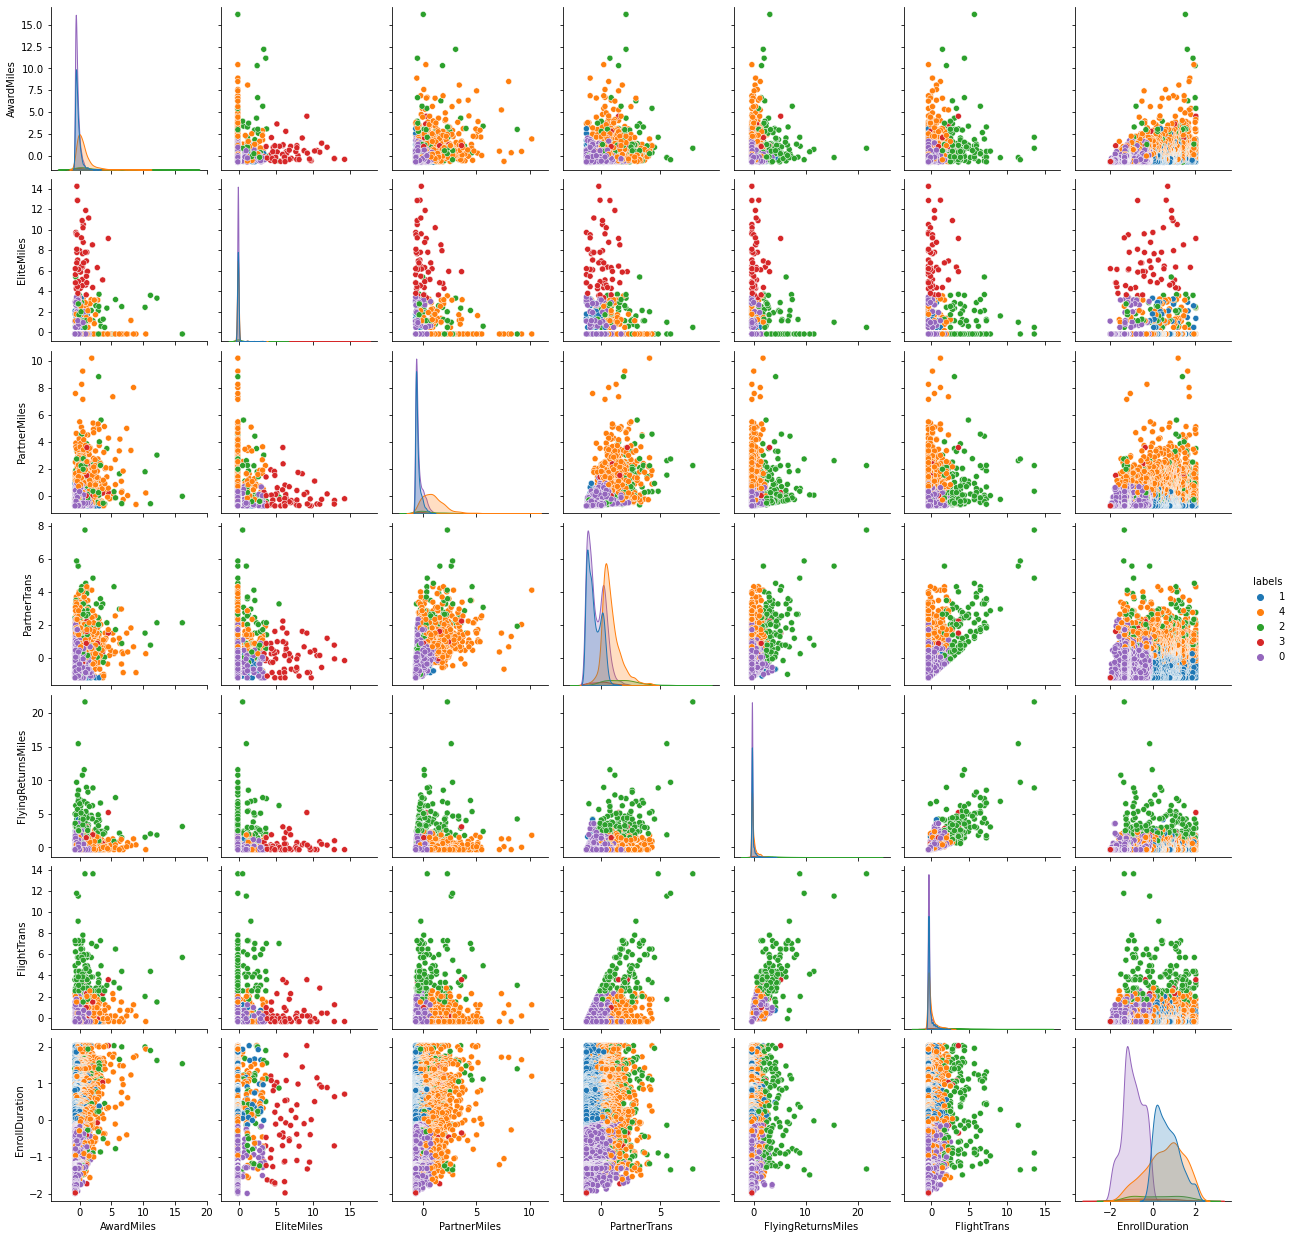

In [ ]:
# making a pairwise plot to observe the clustering

sns.pairplot(ffp_data1, x_vars = required_cols, y_vars = required_cols, hue='labels', diag_kind='kde')
plt.show()

Interpretation:

We don't observe much improvement from the previous pairwise plot. The clusters are still overlapping in each of these plots too. Now, we will dramatically increase the number of clusters. We will choose K = 10 

In [ ]:
# clustering the data in ffp_data1 into 10 groups and label the datapoints with their
# assignment to clusters

k_max = 10
k_means_10 = cluster.KMeans(n_clusters= k_max,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 100)
k_means_10.fit(ffp_data1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
labels_10 = k_means_10.labels_
Ccenters = k_means_10.cluster_centers_
ffp_data1['labels'] = labels_10
ffp_data1['labels'] = ffp_data1['labels'].astype('str')
print(ffp_data1['labels'])

0       4
1       4
2       4
3       4
4       9
       ..
3994    2
3995    2
3996    3
3997    2
3998    2
Name: labels, Length: 3999, dtype: object


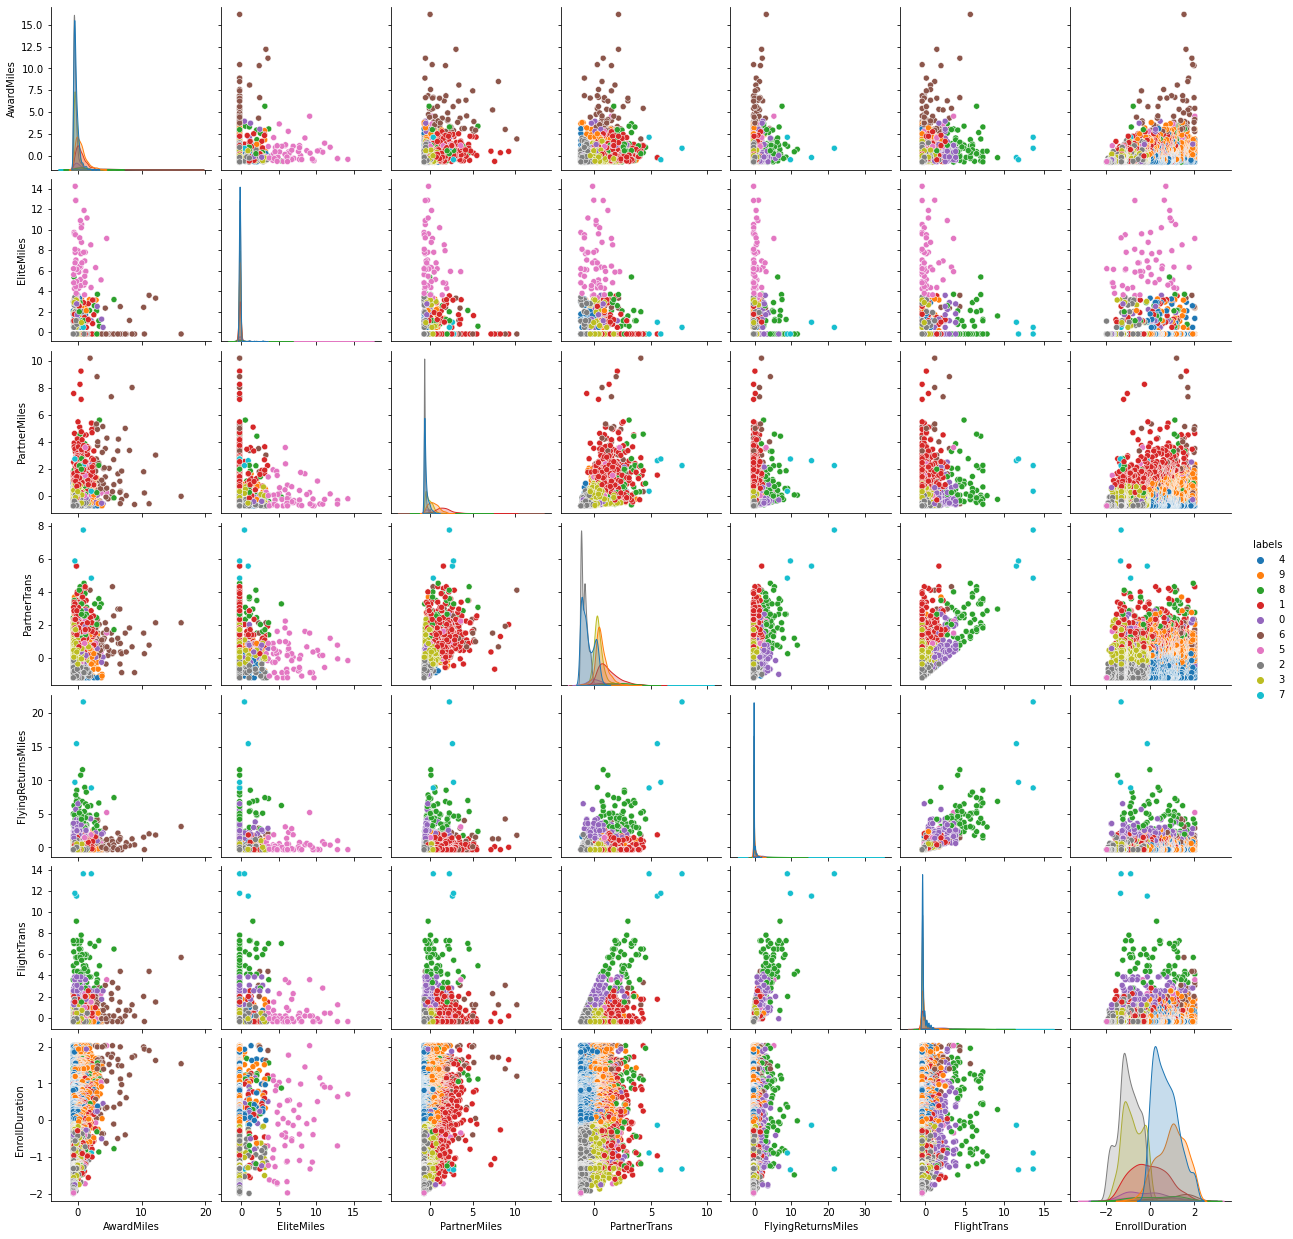

In [ ]:
# making a pairwise plot to observe the clustering

sns.pairplot(ffp_data1, x_vars = required_cols, y_vars = required_cols, hue='labels', diag_kind='kde')
plt.show()

Interpretation: 

The clusters are still overlapping. We may have to increase the number of clusters further, but that will increase computational costs. 